In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# to split the datasets
from sklearn.model_selection import train_test_split
# multivariate imputation
from sklearn.impute import KNNImputer

In [5]:
df=pd.read_csv("/content/water_potability.csv")

In [ ]:
df.head()

In [9]:
df.isnull().mean()*100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


#Split into Test and Train

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop("Potability",axis=1),
    df['Potability'],
    test_size=0.3,
    random_state=0)

In [16]:
X_train.shape, X_test.shape

((2293, 9), (983, 9))

In [20]:
X_train_t=X_train.copy()
X_test_t=X_test.copy()

In [21]:
X_train_t.reset_index(inplace=True, drop=True)
X_test_t.reset_index(inplace=True, drop=True)

In [22]:
X_train_t.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,NaN,215.997117,35971.025113,10.030508,330.858927,558.108549,14.337804,81.769775,2.934137
1,9.130796,200.032348,28273.603243,7.497526,NaN,453.873571,12.860514,64.178494,3.025707
2,7.277144,194.880861,18270.105061,6.121931,344.879754,402.664582,15.459752,76.987232,4.931354
3,5.499489,230.308775,13902.968646,9.619575,352.084333,442.167006,14.740787,NaN,5.846827
4,NaN,214.737831,12666.005325,7.092691,302.491768,319.423051,15.433834,92.693936,5.005879


In [23]:
X_train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
906,NaN,215.997117,35971.025113,10.030508,330.858927,558.108549,14.337804,81.769775,2.934137
2998,9.130796,200.032348,28273.603243,7.497526,NaN,453.873571,12.860514,64.178494,3.025707
1818,7.277144,194.880861,18270.105061,6.121931,344.879754,402.664582,15.459752,76.987232,4.931354
1042,5.499489,230.308775,13902.968646,9.619575,352.084333,442.167006,14.740787,NaN,5.846827
838,NaN,214.737831,12666.005325,7.092691,302.491768,319.423051,15.433834,92.693936,5.005879


In [53]:
imputer = KNNImputer(
    n_neighbors=10, # the number of neighbours K
    weights='distance', # the weighting factor
    metric='nan_euclidean', # the metric to find the neighbours
    add_indicator=False, # whether to add a missing indicator
)

In [54]:
train_t = imputer.fit_transform(X_train_t)
test_t = imputer.fit_transform(X_test_t)

# sklearn returns a Numpy array
# lets make a dataframe
train_t = pd.DataFrame(train_t, columns=X_train_t.columns)
test_t = pd.DataFrame(test_t, columns=X_test_t.columns)

train_t.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,6.517463,215.997117,35971.025113,10.030508,330.858927,558.108549,14.337804,81.769775,2.934137
1,9.130796,200.032348,28273.603243,7.497526,306.164959,453.873571,12.860514,64.178494,3.025707
2,7.277144,194.880861,18270.105061,6.121931,344.879754,402.664582,15.459752,76.987232,4.931354
3,5.499489,230.308775,13902.968646,9.619575,352.084333,442.167006,14.740787,73.577308,5.846827
4,7.114526,214.737831,12666.005325,7.092691,302.491768,319.423051,15.433834,92.693936,5.005879


# Check Distribution

Text(0.5, 1.0, 'Variable ph distribution after KNN Imputation')

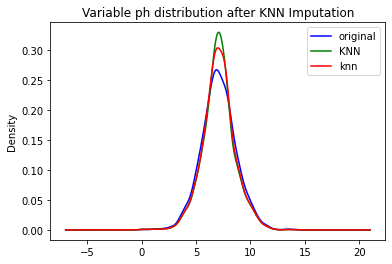

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['ph'].plot(kind='kde', ax=ax, color='blue')
train_t['ph'].plot(kind='kde', ax=ax, color='Green')
X_train_bayes['ph'].plot(kind='kde', ax=ax, color='Red')
lines, labels = ax.get_legend_handles_labels()
labels = ['original', 'KNN','knn']
ax.legend(lines, labels, loc='best')
plt.title('Variable ph distribution after KNN Imputation')

In [33]:
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer

In [34]:
imputer_bayes = IterativeImputer(
    estimator=BayesianRidge(),
    max_iter=10,
    random_state=0)

In [35]:
train_m=train_t.copy()

In [36]:
X_train_bayes = imputer_bayes.fit_transform(train_m)


In [39]:
X_train_bayes = pd.DataFrame(X_train_bayes, columns =train_m.columns )


In [40]:
X_train_bayes.isnull().mean()*100

ph                 0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Sulfate            0.0
Conductivity       0.0
Organic_carbon     0.0
Trihalomethanes    0.0
Turbidity          0.0
dtype: float64

Text(0.5, 1.0, 'Variable ph distribution after KNN Imputation')

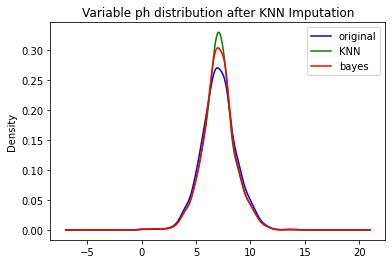

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['ph'].plot(kind='kde', ax=ax, color='blue')
train_t['ph'].plot(kind='kde', ax=ax, color='Green')
X_train_bayes['ph'].plot(kind='kde', ax=ax, color='Red')
lines, labels = ax.get_legend_handles_labels()
labels = ['original', 'KNN','bayes']
ax.legend(lines, labels, loc='best')
plt.title('Variable ph distribution after KNN Imputation')

In [51]:
X_train.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,1950.000000,2293.000000,2293.000000,2293.000000,1753.000000,2293.000000,2293.000000,2176.000000,2293.000000
mean,7.082037,196.766104,21888.972752,7.129040,333.853540,425.608813,14.307714,66.552600,3.977328
std,1.581639,32.591415,8736.321466,1.591804,41.721028,81.360464,3.333094,16.282555,0.769069
min,0.000000,73.492234,320.942611,0.530351,129.000000,181.483754,2.200000,8.577013,1.450000
25%,6.102663,177.055890,15456.220086,6.116863,306.800286,364.794883,12.049131,56.322521,3.469561
50%,7.041594,197.049965,20922.154463,7.132154,333.271370,421.220228,14.243374,66.762190,3.961731
75%,7.992247,217.219746,27179.404820,8.090494,360.668259,480.848063,16.584571,77.530469,4.497629
max,14.000000,323.124000,56867.859236,13.043806,481.030642,753.342620,28.300000,116.161622,6.739000


In [50]:
X_train_bayes.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000
mean,7.086026,196.766104,21888.972752,7.129040,333.579141,425.608813,14.307714,66.551929,3.977328
std,1.488878,32.591415,8736.321466,1.591804,38.156244,81.360464,3.333094,15.942652,0.769069
min,0.000000,73.492234,320.942611,0.530351,129.000000,181.483754,2.200000,8.577013,1.450000
25%,6.204429,177.055890,15456.220086,6.116863,311.726288,364.794883,12.049131,56.801321,3.469561
50%,7.056457,197.049965,20922.154463,7.132154,333.339282,421.220228,14.243374,66.728402,3.961731
75%,7.913647,217.219746,27179.404820,8.090494,356.211614,480.848063,16.584571,77.142104,4.497629
max,14.000000,323.124000,56867.859236,13.043806,481.030642,753.342620,28.300000,116.161622,6.739000
